In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

In [4]:
products = pd.read_csv('amazon_baby_subset.csv')
products.iloc[:10]

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1
5,Our Baby Girl Memory Book,"Beautiful book, I love it to record cherished ...",5,1
6,Hunnt&reg; Falling Flowers and Birds Kids Nurs...,"Try this out for a spring project !Easy ,fun a...",5,1
7,Blessed By Pope Benedict XVI Divine Mercy Full...,very nice Divine Mercy Pendant of Jesus now on...,5,1
8,Cloth Diaper Pins Stainless Steel Traditional ...,We bought the pins as my 6 year old Autistic s...,4,1
9,Cloth Diaper Pins Stainless Steel Traditional ...,It has been many years since we needed diaper ...,5,1


In [5]:
import json

with open('important_words.json') as json_data:
    important_words = json.load(json_data)

In [6]:
products = products.fillna({'review':' '})
def remove_punctuation(text):
    #print(text)
    import string
    instr = string.punctuation
    outstr = " "*len(string.punctuation)
    table = str.maketrans(instr, outstr )
    return text.translate(table) 
products['review_clean'] = products['review'].apply(remove_punctuation)
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

In [7]:
with open('module-4-assignment-train-idx.json') as json_data:
    train = json.load(json_data)
    
with open('module-4-assignment-validation-idx.json') as json_data:
    test = json.load(json_data)

In [8]:
train_data = products.iloc[train]
validation_data  = products.iloc[test]

In [9]:
train_data

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried non stop when I trie...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of baby s first and favorite books and it...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this ...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Our Baby Girl Memory Book,"Beautiful book, I love it to record cherished ...",5,1,Beautiful book I love it to record cherished ...,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,Hunnt&reg; Falling Flowers and Birds Kids Nurs...,"Try this out for a spring project !Easy ,fun a...",5,1,Try this out for a spring project Easy fun a...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Blessed By Pope Benedict XVI Divine Mercy Full...,very nice Divine Mercy Pendant of Jesus now on...,5,1,very nice Divine Mercy Pendant of Jesus now on...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Cloth Diaper Pins Stainless Steel Traditional ...,We bought the pins as my 6 year old Autistic s...,4,1,We bought the pins as my 6 year old Autistic s...,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,Newborn Baby Tracker&reg; - Round the Clock Ch...,We found this book at a rummage sale and found...,5,1,We found this book at a rummage sale and found...,2,3,0,0,1,...,0,0,0,0,1,0,0,0,1,0
11,Newborn Baby Tracker&reg; - Round the Clock Ch...,I'm a new mom and I was looking for something ...,5,1,I m a new mom and I was looking for something ...,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def get_numpy_data(dataframe, features, label):
    dataframe['constant'] = 1
    features = ['constant'] + features
    features_frame = dataframe[features]
    feature_matrix = features_frame.as_matrix()
    label_sarray = dataframe[label]
    label_array = label_sarray.as_matrix()
    return(feature_matrix, label_array)

In [11]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, 'sentiment')
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, 'sentiment') 

C:\Users\kinsly\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
def predict_probability(feature_matrix, coefficients):
    # Take dot product of feature_matrix and coefficients  
    # YOUR CODE HERE
    score = np.dot(feature_matrix, coefficients)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    # YOUR CODE HERE
    predictions = 1/(1+np.exp(-score))
    
    # return predictions
    return predictions

In [13]:
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant): 
    
    # Compute the dot product of errors and feature
    ## YOUR CODE HERE
    derivative = np.dot(errors, feature)

    # add L2 penalty term for any feature that isn't the intercept.
    if not feature_is_constant: 
        ## YOUR CODE HERE
        derivative -= 2*l2_penalty*coefficient
        
    return derivative

In [14]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    
    return lp

In [15]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in range(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        ## YOUR CODE HERE
        predictions = predict_probability(feature_matrix, coefficients)
        
        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in range(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j].
            # Compute the derivative for coefficients[j]. Save it in a variable called derivative
            ## YOUR CODE HERE
            derivative = feature_derivative_with_L2(errors, feature_matrix[:,j], 
                                                    coefficients[j], l2_penalty, is_intercept)
            
            # add the step size times the derivative to the current coefficient
            ## YOUR CODE HERE
            coefficients[j] = coefficients[j] + step_size*derivative
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
            print ('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
    return coefficients

In [130]:
 logistic_regression_with_L2(feature_matrix_train, sentiment_train, 
                             initial_coefficients, step_size, 0, max_iter)

iteration   0: log likelihood of observed labels = -29174.46252004
iteration   1: log likelihood of observed labels = -28994.25965922
iteration   2: log likelihood of observed labels = -28821.01574769
iteration   3: log likelihood of observed labels = -28654.15509322
iteration   4: log likelihood of observed labels = -28493.22839730
iteration   5: log likelihood of observed labels = -28337.86594300
iteration   6: log likelihood of observed labels = -28187.75045754
iteration   7: log likelihood of observed labels = -28042.60114529
iteration   8: log likelihood of observed labels = -27902.16409360
iteration   9: log likelihood of observed labels = -27766.20634997
iteration  10: log likelihood of observed labels = -27634.51213746
iteration  11: log likelihood of observed labels = -27506.88032960
iteration  12: log likelihood of observed labels = -27383.12267664
iteration  13: log likelihood of observed labels = -27263.06248798
iteration  14: log likelihood of observed labels = -27146.5335

array([ -6.35441750e-02,   5.72670636e-02,   3.93754202e-03,
         8.05297765e-01,   1.05778599e+00,  -5.72012824e-03,
        -2.88017752e-01,   8.76798031e-04,   9.86104926e-01,
         5.24842701e-01,  -8.76230903e-02,   2.06839684e-01,
         4.73895507e-01,  -1.93582710e-01,   1.51070829e-01,
        -1.86943275e-02,   1.09857592e-01,  -6.11481096e-02,
        -1.46345451e-01,  -2.69037252e-01,   1.66340477e-01,
         2.54953157e-01,  -1.40548803e-02,   1.05308330e+00,
        -3.64944065e-02,   2.87482015e-03,  -6.79123448e-02,
         1.97772168e-01,   1.83797557e-01,  -2.67191576e-01,
         9.48587607e-02,   3.55838296e-01,  -4.14329642e-02,
        -3.65354115e-01,   8.40412154e-01,   4.26848733e-01,
        -2.77792243e-03,  -1.22253188e-01,   5.07785222e-02,
        -1.05011041e-01,  -1.37260917e-01,   1.12839464e-01,
         4.36416842e-02,   2.49688627e-02,  -1.92405464e-01,
         2.61280439e-01,   1.01842651e-01,  -1.75159679e-01,
         3.53694534e-01,

Let us train models with increasing amounts of regularization, starting with no L2 penalty, which is equivalent to our previous logistic regression implementation. Train 6 models with L2 penalty values 0, 4, 10, 1e2, 1e3, and 1e5.

In [16]:
feature_matrix = feature_matrix_train 
sentiment = sentiment_train 
initial_coefficients = np.zeros(194)
step_size = 5e-6
max_iter = 501
l2_penalty = [0,4,10,1e2,1e3,1e5]
coefficient_six = np.zeros((6,194))
for i in range(len(l2_penalty)):
    print('l2_penalty = %d'%(l2_penalty[i]))
    coefficient_six[i,:] = logistic_regression_with_L2(feature_matrix_train, sentiment_train, 
                            initial_coefficients, step_size, l2_penalty[i], max_iter)

l2_penalty = 0
iteration   0: log likelihood of observed labels = -29174.46252004
iteration   1: log likelihood of observed labels = -28994.25965922
iteration   2: log likelihood of observed labels = -28821.01574769
iteration   3: log likelihood of observed labels = -28654.15509322
iteration   4: log likelihood of observed labels = -28493.22839730
iteration   5: log likelihood of observed labels = -28337.86594300
iteration   6: log likelihood of observed labels = -28187.75045754
iteration   7: log likelihood of observed labels = -28042.60114529
iteration   8: log likelihood of observed labels = -27902.16409360
iteration   9: log likelihood of observed labels = -27766.20634997
iteration  10: log likelihood of observed labels = -27634.51213746
iteration  11: log likelihood of observed labels = -27506.88032960
iteration  12: log likelihood of observed labels = -27383.12267664
iteration  13: log likelihood of observed labels = -27263.06248798
iteration  14: log likelihood of observed label

In [17]:
len(coefficient_six[i,:])

194

In [57]:
word_coefficient_tuples[-5:]

[('returned', -0.57801489233604952),
 ('waste', -0.62140804515379799),
 ('return', -0.74999993144909027),
 ('money', -0.77610650964617434),
 ('disappointed', -0.97178724096828883)]

In [24]:
coefficients_dataframe = pd.DataFrame(data = coefficient_six[:,1:], columns = important_words)

In [25]:
coefficients_dataframe

,baby,one,great,love,use,would,like,easy,little,seat,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,0.057267,0.003938,0.805298,1.057786,-0.005720,-0.288018,0.000877,0.986105,0.524843,-0.087623,...,0.060094,-0.200794,-0.281237,0.178390,-0.122603,0.049537,-0.179126,-0.158812,-0.031303,-0.231511
1,0.057257,0.003734,0.800559,1.050081,-0.005417,-0.286993,0.000771,0.979136,0.521797,-0.086791,...,0.059675,-0.199125,-0.278825,0.176788,-0.121588,0.049202,-0.177583,-0.157522,-0.031006,-0.229438
2,0.057242,0.003434,0.793583,1.038744,-0.004971,-0.285486,0.000614,0.968882,0.517314,-0.085566,...,0.059059,-0.196666,-0.275270,0.174425,-0.120092,0.048709,-0.175309,-0.155624,-0.030569,-0.226381
3,0.057030,-0.000419,0.704918,0.895782,0.000600,-0.266383,-0.001405,0.839636,0.460471,-0.070007,...,0.051200,-0.165281,-0.229903,0.144134,-0.100997,0.042477,-0.146350,-0.131656,-0.024972,-0.187359
4,0.050039,-0.012793,0.379082,0.418066,0.014543,-0.187988,-0.006492,0.403484,0.251394,-0.019022,...,0.023326,-0.062333,-0.082866,0.045472,-0.038625,0.020495,-0.053042,-0.053769,-0.006987,-0.062733
5,0.001529,-0.001992,0.009098,0.009081,0.000338,-0.008143,-0.000854,0.008912,0.005964,0.000608,...,0.000334,-0.001175,-0.001443,0.000473,-0.000786,0.000370,-0.000949,-0.000952,-0.000114,-0.001031


In [28]:
def divide_words(coefficients, important_words):
    coefficient = list((coefficients)[1:]) # exclude intercept
    word_coefficient_tuples = [(word, coefficient) for word, coefficient in zip(important_words, coefficient)]
    word_coefficient_tuples = sorted(word_coefficient_tuples, key=lambda x:x[1], reverse=True)
    positive_word = word_coefficient_tuples[:5]
    negative_word = word_coefficient_tuples[-5:]
    return positive_word, negative_word

In [29]:
divide_words(coefficient_six[0,:], important_words)

([('love', 1.0577859889900521),
  ('loves', 1.053083297995437),
  ('easy', 0.98610492623440726),
  ('perfect', 0.84041215354540433),
  ('great', 0.80529776508706752)],
 [('returned', -0.5727567221802452),
  ('waste', -0.61601791956026342),
  ('return', -0.74330676852863686),
  ('money', -0.76995569274349784),
  ('disappointed', -0.96314219522394628)])

In [35]:
from operator import itemgetter
positive_word, negative_word = divide_words(coefficient_six[1], important_words)
positive_word = list(map(itemgetter(0), positive_word))
negative_word = list(map(itemgetter(0), negative_word))
print(positive_word)
print(negative_word)


['love', 'loves', 'easy', 'perfect', 'great']
['returned', 'waste', 'return', 'money', 'disappointed']


In [55]:
words = positive_word+negative_word

In [42]:
word_dataframe = coefficients_dataframe[positive_word + negative_word]
word_matrix = np.array(word_dataframe)

In [52]:
word_matrix


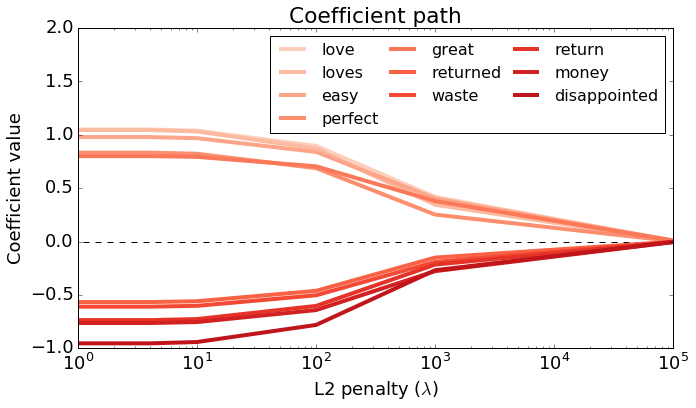

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6


def make_coefficient_plot(words, word_matrix, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')

    for i in range(10):
        color = cmap_positive(0.8*((i+1)/(len(word_matrix.T)*1.2)+0.15))
        plt.plot(xx, word_matrix[:,i],
                 '-', label=words[i], linewidth=4.0, color=color)
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()


make_coefficient_plot(words, word_matrix, l2_penalty)

In [57]:
def get_classification_accuracy(feature_matrix, sentiment, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    apply_threshold = np.vectorize(lambda x: 1. if x > 0  else -1.)
    predictions = apply_threshold(scores)
    
    num_correct = (predictions == sentiment).sum()
    accuracy = num_correct / len(feature_matrix)    
    return accuracy

In [62]:
train_accuracy = {}
train_accuracy[0]   = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficient_six[0])
train_accuracy[4]   = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficient_six[1])
train_accuracy[10]  = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficient_six[2])
train_accuracy[1e2] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficient_six[3])
train_accuracy[1e3] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficient_six[4])
train_accuracy[1e5] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficient_six[5])

validation_accuracy = {}
validation_accuracy[0]   = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficient_six[0])
validation_accuracy[4]   = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficient_six[1])
validation_accuracy[10]  = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficient_six[2])
validation_accuracy[1e2] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficient_six[3])
validation_accuracy[1e3] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficient_six[4])
validation_accuracy[1e5] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficient_six[5])

In [64]:
train_accuracy

{0: 0.78640730860933405,
 4: 0.78628927551285377,
 10: 0.78617124241637359,
 100.0: 0.78482566511649865,
 1000.0: 0.77535941077878234,
 100000.0: 0.68230211751375081}

In [65]:
validation_accuracy

{0: 0.78153300345439269,
 4: 0.78171972738306417,
 10: 0.78190645131173564,
 100.0: 0.78097283166837828,
 1000.0: 0.77126318737746247,
 100000.0: 0.66800485482214544}